# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis
----

#### Note
*  1- The date is 8/6/2019 so it's in August and as we can see from the first plot, as we get closer to the equator the temperature increase. However, the maximum temperature is not at equator (latitude=0). Northern hemisphere is generally warmer than southern hemisphere (since it's winter).
                                    
* 2- In the Humidity plot, we can see that around equator (-20<latitude<20), the humidity is high for most of the cities. As we go far from the equator, we cant see any specific trend. It means that there are other factors involved.
                                    
*  3- In the cloudiness and wind speed plots, we can't see any specific trend. It means that they are dependent on other factors.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from datetime import date
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url= "http://api.openweathermap.org/data/2.5/weather?"
#query_url= f"{url}lat={lats[city]}&lon={lngs[city]}&appid={api_key}" 
api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_name=[]
cloudiness=[]
country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_speed=[]
City_Number=1

for city in cities:
    #query_url=f"{url}&q={city}"
    #print(query_url)
    try:
        response=requests.get(f"{url}&q={city}").json()
        #print(response)
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Wind_speed.append(response["wind"]["speed"])
        #print(query_url)
        #print(Lat)
        city_record = response["name"]
        print(f"Processing Record {City_Number} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        City_Number= City_Number + 1
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


        

Processing Record 1 | Dedovichi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=dedovichi
Processing Record 2 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=carnarvon
Processing Record 3 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=albany
Processing Record 4 | Moree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=moree
Processing Record 5 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=barrow
City not found. Skipping...
City not found. Skipping...
Processing Record 6 | Loa Janan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=loa janan
Processing Record 7 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 56 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=talnakh
Processing Record 57 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=chokurdakh
City not found. Skipping...
Processing Record 58 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=chapais
Processing Record 59 | Mazagao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=mazagao
Processing Record 60 | Moba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=moba
Processing Record 61 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=kloulklubed
Processing Record 62 | Kampong Thum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc7

Processing Record 112 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=bredasdorp
Processing Record 113 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=saint-philippe
Processing Record 114 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=saldanha
Processing Record 115 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=leningradskiy
Processing Record 116 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=quatre cocos
Processing Record 117 | Dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=dicabisagan
Processing Record 118 | Oslo
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 168 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=kavieng
Processing Record 169 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=thompson
City not found. Skipping...
Processing Record 170 | Hidalgo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=hidalgo
Processing Record 171 | Acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=acapulco
Processing Record 172 | Billings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=billings
City not found. Skipping...
Processing Record 173 | Eslov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=eslov
City not found. Skipping...
Processing Record 174 | Korgen
http://api.openweathermap

Processing Record 223 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=ribeira grande
City not found. Skipping...
Processing Record 224 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=harper
City not found. Skipping...
City not found. Skipping...
Processing Record 225 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=victoria
Processing Record 226 | Rabaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=rabaul
Processing Record 227 | Bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=bakchar
Processing Record 228 | Catumbela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=catumbela
Processing Record 229 | Calbuco
http://api

Processing Record 279 | Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=gat
Processing Record 280 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=cabedelo
Processing Record 281 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=constitucion
Processing Record 282 | Dalvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=dalvik
City not found. Skipping...
Processing Record 283 | Kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=kenai
Processing Record 284 | Makokou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=makokou
Processing Record 285 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70e

Processing Record 335 | Salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=salinopolis
Processing Record 336 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=port augusta
Processing Record 337 | Bintulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=bintulu
City not found. Skipping...
Processing Record 338 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=fortuna
Processing Record 339 | Merrill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=merrill
Processing Record 340 | Nizhniy Odes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=nizhniy odes
Processing Record 341 | Pravda
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 390 | Pionerskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=pionerskiy
Processing Record 391 | Sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=sabang
City not found. Skipping...
Processing Record 392 | Trincomalee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=trincomalee
Processing Record 393 | Paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=paita
Processing Record 394 | Sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=sisimiut
Processing Record 395 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=komsomolskiy
Processing Record 396 | Wakefield
http://api.openweathermap.org/data/2.5/weather?units=Imperia

City not found. Skipping...
City not found. Skipping...
Processing Record 446 | Boa Vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=boa vista
Processing Record 447 | Altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=altay
City not found. Skipping...
Processing Record 448 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=aykhal
Processing Record 449 | Udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=udachnyy
Processing Record 450 | Kichera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=kichera
Processing Record 451 | Taber
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=taber
Processing Record 452 | Rahuri
http://api.openweathermap.org/d

Processing Record 501 | Conde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=conde
Processing Record 502 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=sinnamary
Processing Record 503 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=launceston
Processing Record 504 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=port lincoln
Processing Record 505 | Muroto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=muroto
City not found. Skipping...
Processing Record 506 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d42adcc70ef1a06785c6f157dab55d93&q=san cristobal
Processing Record 507 | Bakel
http://api.openweathermap.org/data/2.5/weather?units=Imper

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict={"City":city_name,"Cloudiness":cloudiness,"Country":country,"date":Date,"Humidity":Humidity,"Latitude":Lat,
              "Longitude":Lng,"Maximum_temperature":Max_temp,"Wind Speed":Wind_speed}
weather_pd=pd.DataFrame(weather_dict)
weather_pd.to_html(buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None,
                  float_format=None, sparsify=None, index_names=True, justify=None, bold_rows=True, classes=None, escape=True, 
                  max_rows=None, max_cols=None, show_dimensions=False, notebook=False)
weather_pd.to_html('data-panda.html')
#weather_pd.head(100)


In [26]:
weather_pd.to_csv(r'C:\Users\user\Desktop\Class\GTATL201905DATA3\06-Python-APIs\Homework\Instructions/cities.csv')
weather_pd.count()

City                   521
Cloudiness             521
Country                521
date                   521
Humidity               521
Latitude               521
Longitude              521
Maximum_temperature    521
Wind Speed             521
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

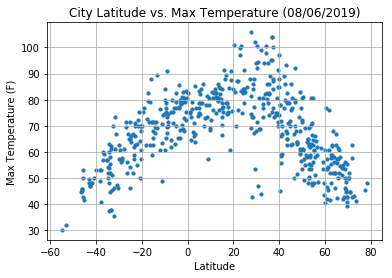

In [54]:
plt.scatter(weather_pd["Latitude"], weather_pd["Maximum_temperature"], marker="o", s=10)

dt1 =date.fromtimestamp(1565130316)
dt1
a = '201986'
date = datetime.strptime(a, '%Y%m%d').strftime('%m/%d/%Y')
date

plt.title("City Latitude vs. Max Temperature (08/06/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig(r"C:\Users\user\Desktop\Class\GTATL201905DATA3\06-Python-APIs\Homework\Instructions/Max_Temp_vs_Latitude.png")

plt.show()



#### Latitude vs. Humidity Plot

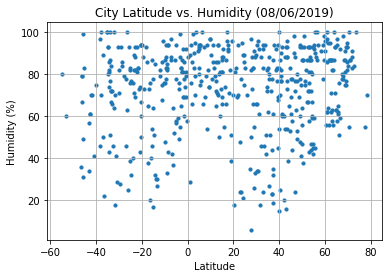

In [59]:
plt.scatter(weather_pd["Latitude"], weather_pd["Humidity"], marker="o", s=10)

# dt1 =date.fromtimestamp(1565130316)
# dt1
# a = '201986'
# date = datetime.strptime(a, '%Y%m%d').strftime('%m/%d/%Y')
# date

plt.title("City Latitude vs. Humidity (08/06/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig(r"C:\Users\user\Desktop\Class\GTATL201905DATA3\06-Python-APIs\Homework\Instructions/Humidity_vs_Latitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

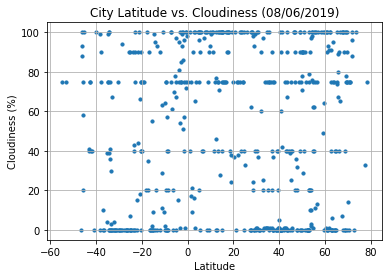

In [58]:
plt.scatter(weather_pd["Latitude"], weather_pd["Cloudiness"], marker="o", s=10)

# dt1 =date.fromtimestamp(1565130316)
# dt1
# a = '201986'
# date = datetime.strptime(a, '%Y%m%d').strftime('%m/%d/%Y')
# date

plt.title("City Latitude vs. Cloudiness (08/06/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig(r"C:\Users\user\Desktop\Class\GTATL201905DATA3\06-Python-APIs\Homework\Instructions/Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

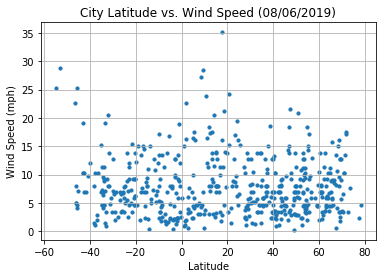

In [60]:
plt.scatter(weather_pd["Latitude"], weather_pd["Wind Speed"], marker="o", s=10)

# dt1 =date.fromtimestamp(1565130316)
# dt1
# a = '201986'
# date = datetime.strptime(a, '%Y%m%d').strftime('%m/%d/%Y')
# date

plt.title("City Latitude vs. Wind Speed (08/06/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig(r"C:\Users\user\Desktop\Class\GTATL201905DATA3\06-Python-APIs\Homework\Instructions/Wind Speed_vs_Latitude.png")

plt.show()